In [273]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [274]:
df=pd.read_csv('rainfall.csv')

In [275]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [276]:
import datetime as dt

In [277]:
df['Date']=pd.to_datetime(df['Date'])

In [278]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [279]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [280]:
df.drop('Date', axis = 1, inplace = True)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
year                0
month               0
day                 0
dtype: int64


<AxesSubplot:>

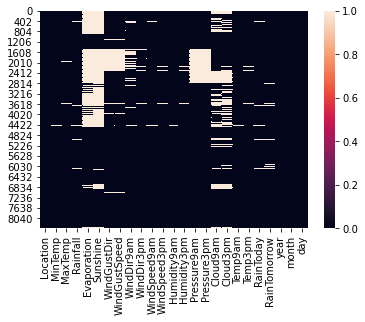

In [282]:
print(df.isnull().sum())
sns.heatmap(df.isnull())

missing values are there.

In [283]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day'],
      dtype='object')

In [284]:
# categorical data: 
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 6
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [285]:
# Numerical Features:

numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 19
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


In [286]:
df[categorical_features].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [287]:
categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]

In [288]:
for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

In [289]:
df[categorical_features].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [290]:
df[numerical_features].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
year                0
month               0
day                 0
dtype: int64

In [291]:
numerical_features_with_null = [feature for feature in numerical_features if df[feature].isnull().sum()]

In [292]:
for each_feature in numerical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

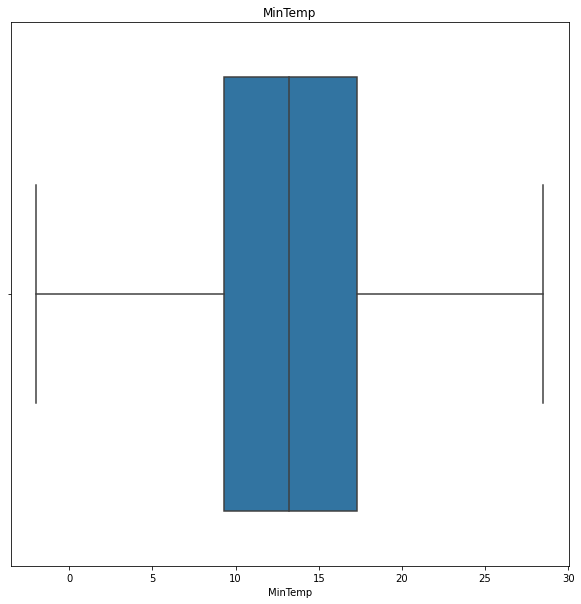

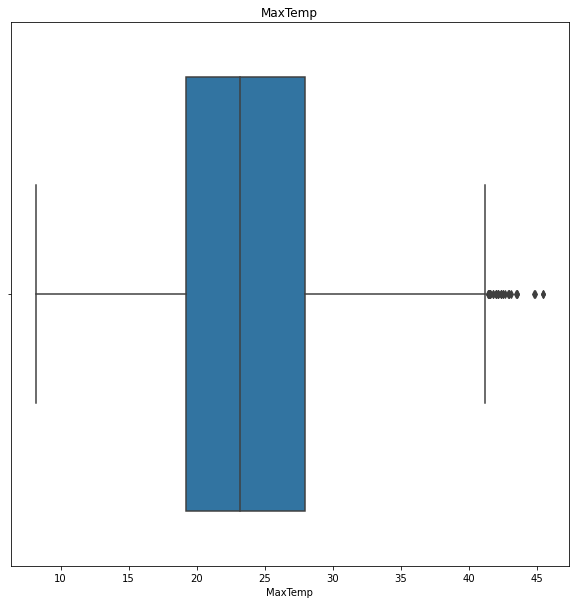

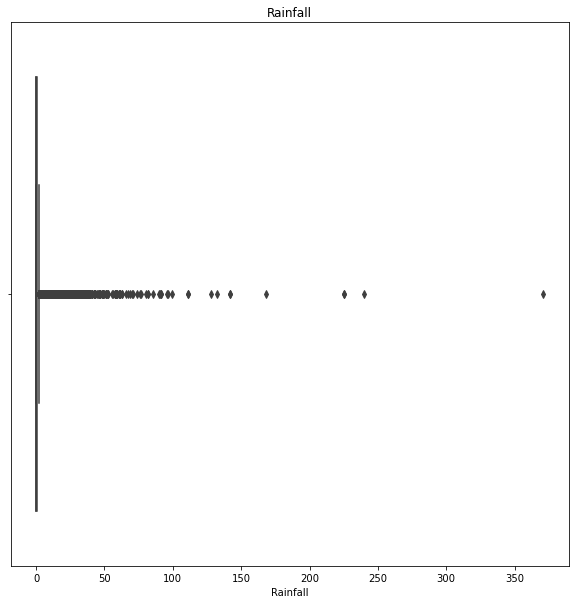

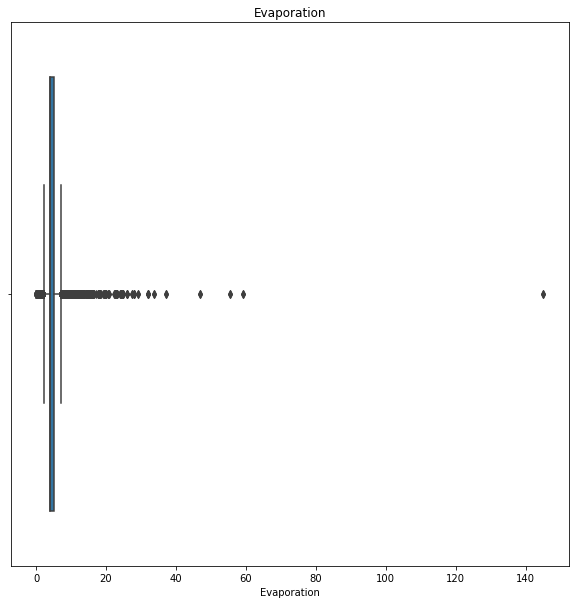

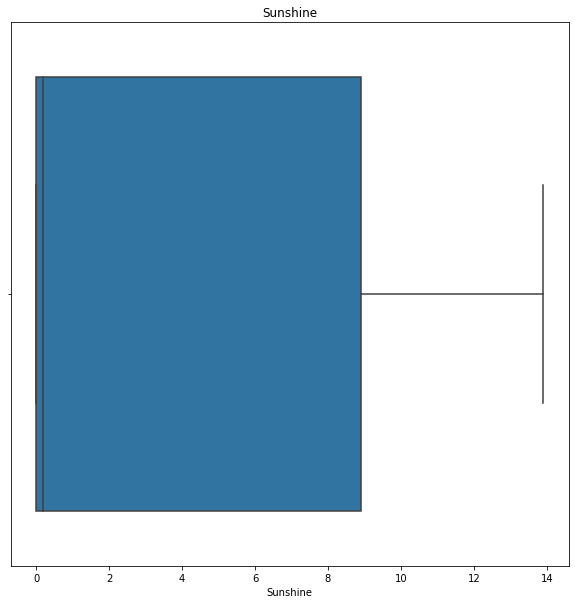

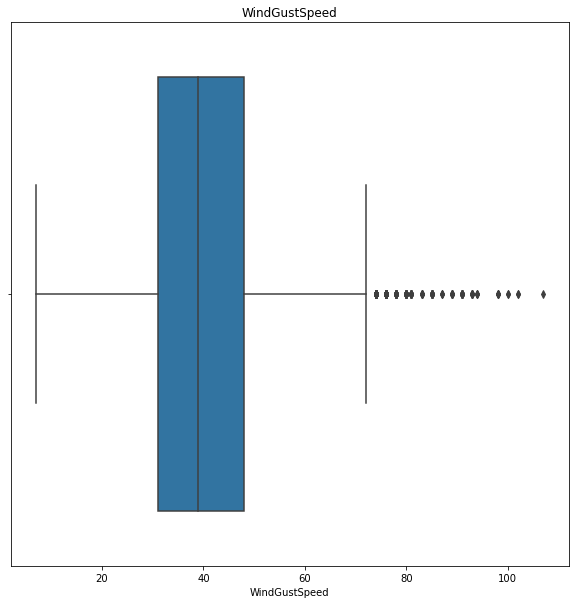

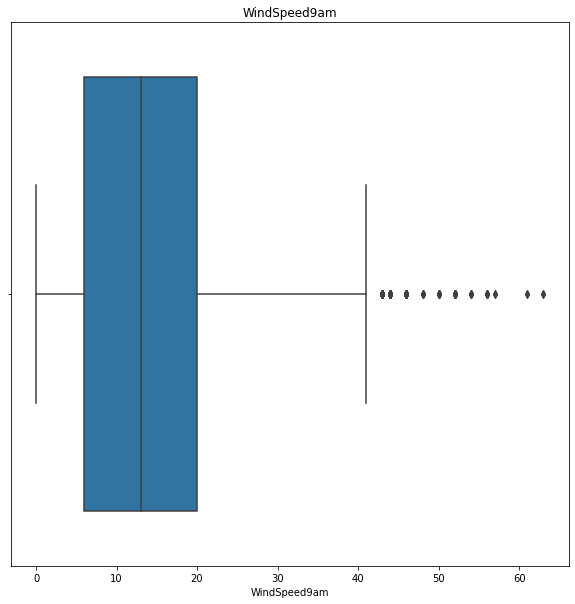

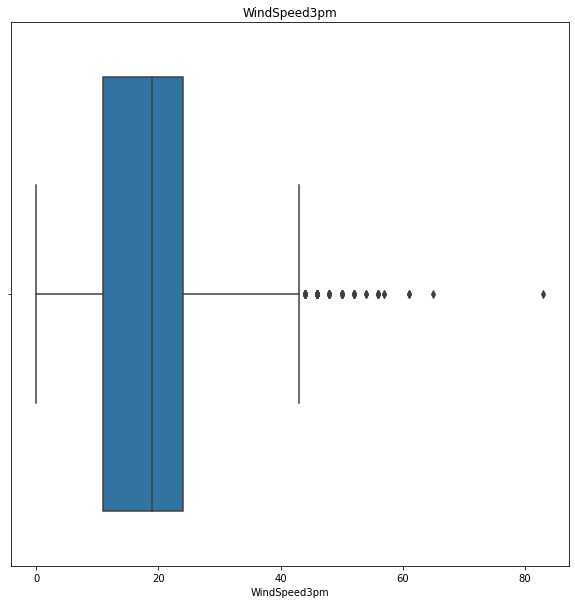

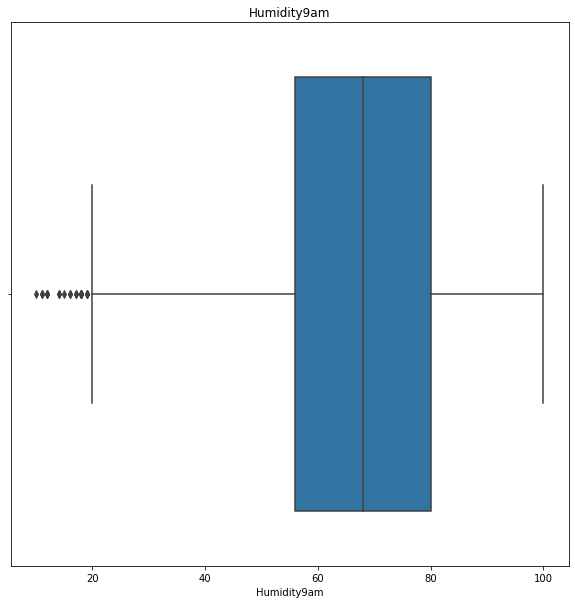

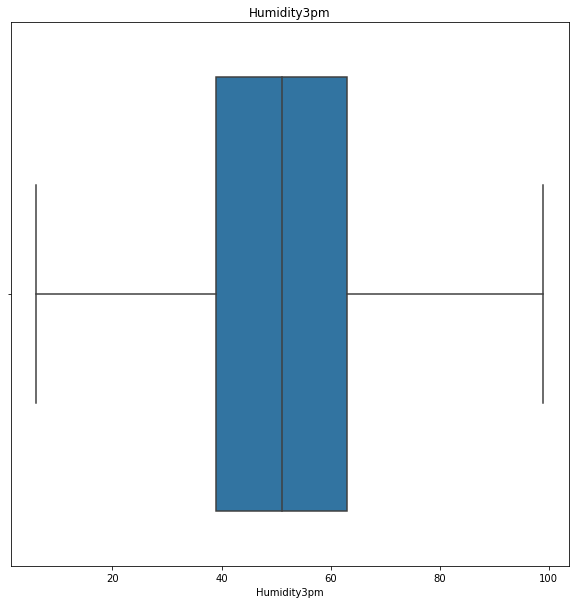

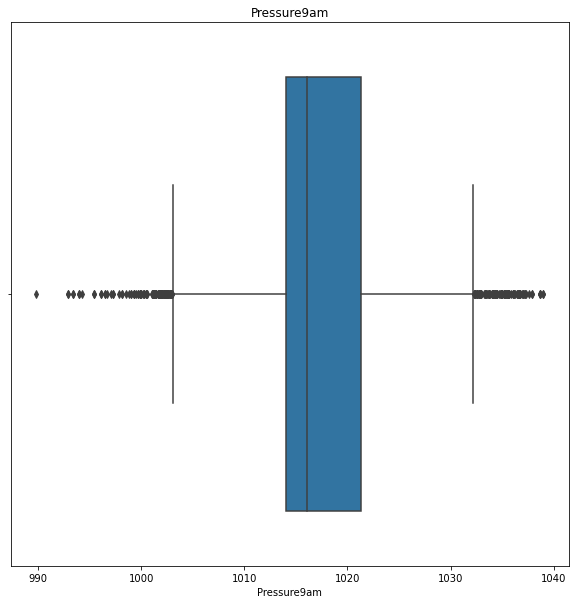

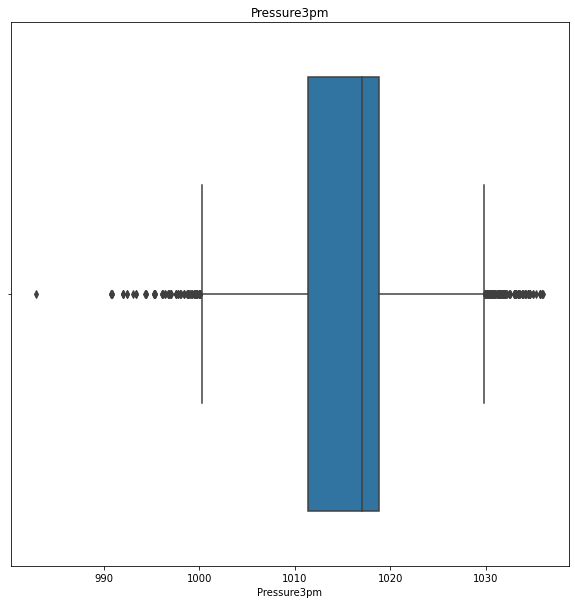

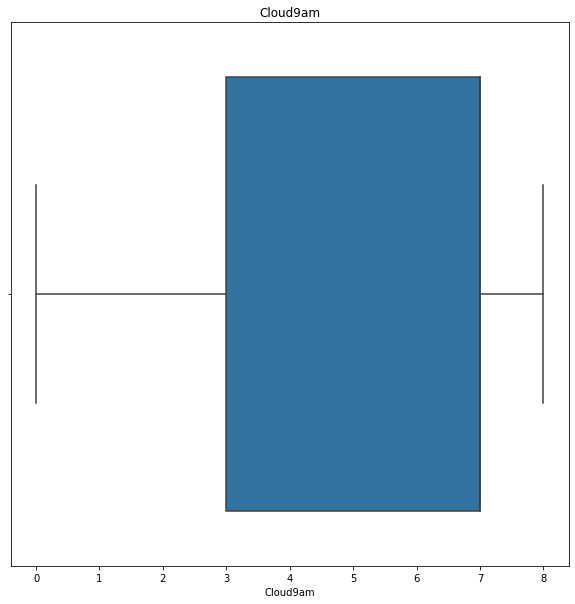

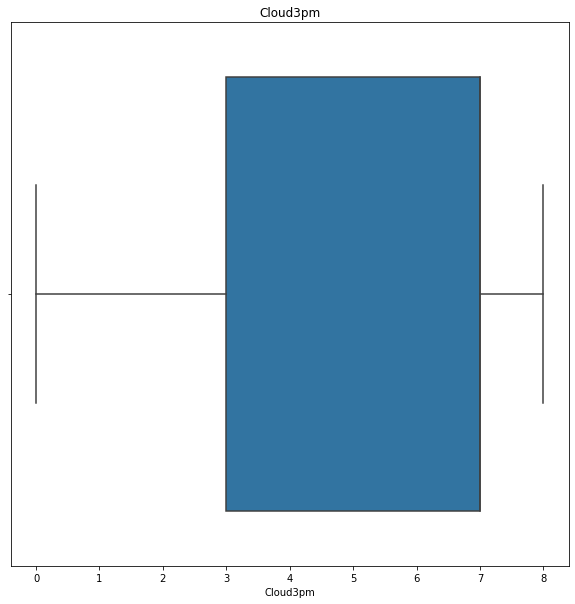

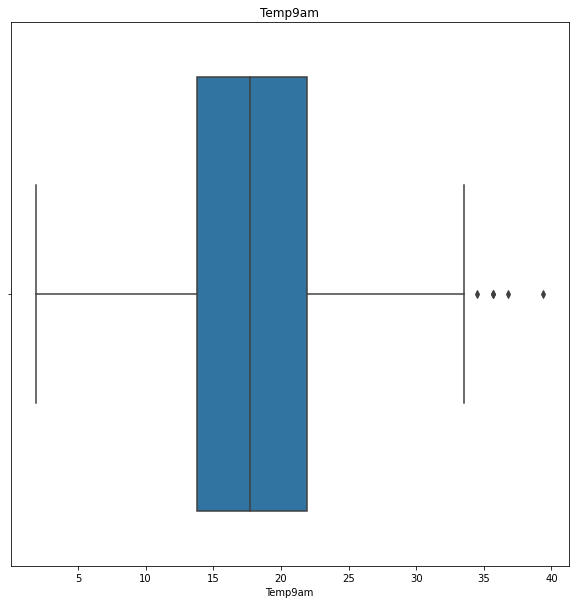

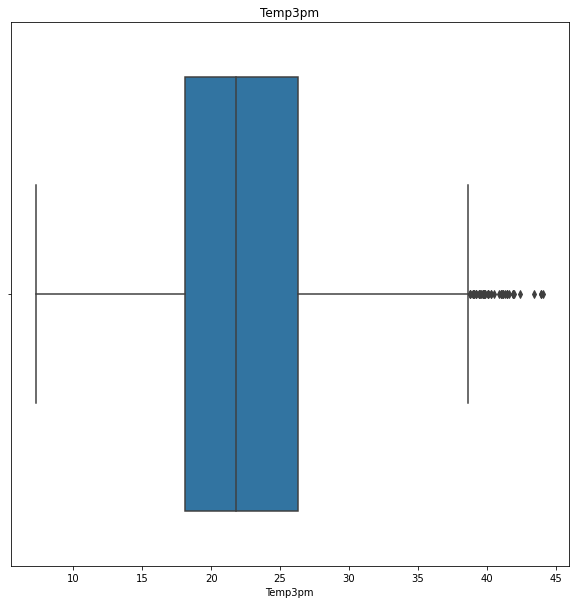

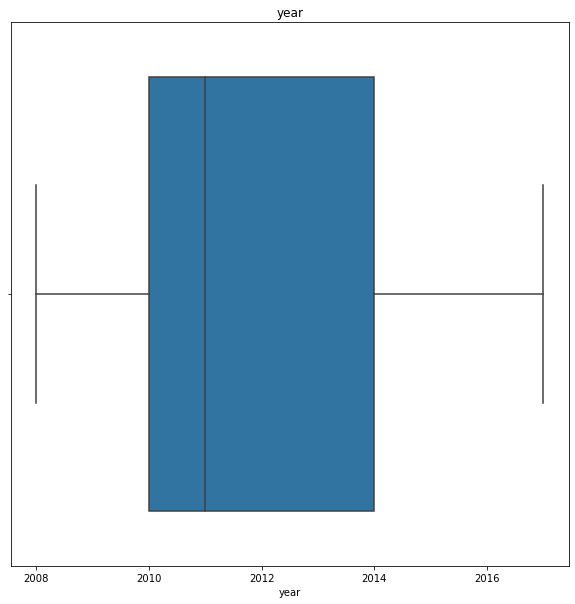

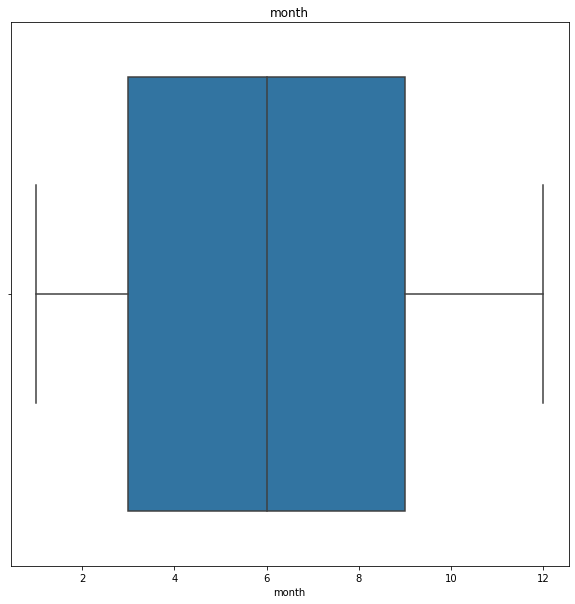

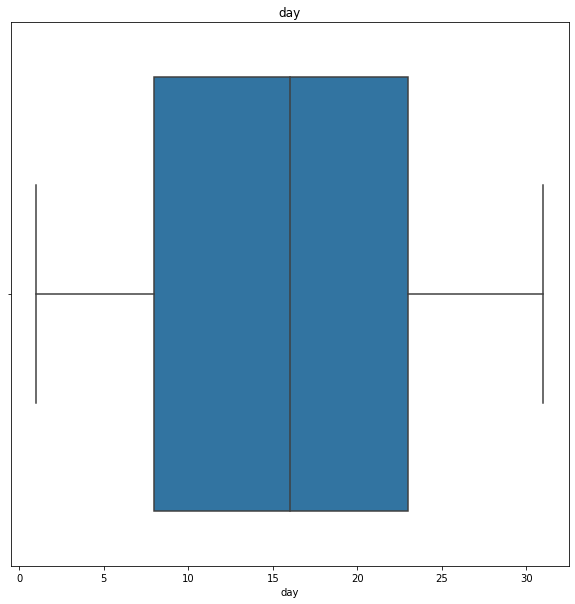

In [293]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)

In [294]:
features_with_outliers = ['Evaporation', 'WindGustSpeed','Pressure9am','Pressure3pm','Temp3pm']

In [295]:
# Replacing outliers using IQR:

for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

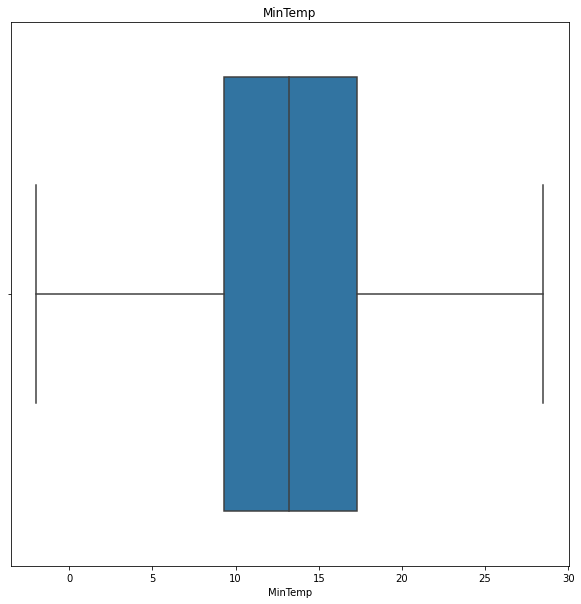

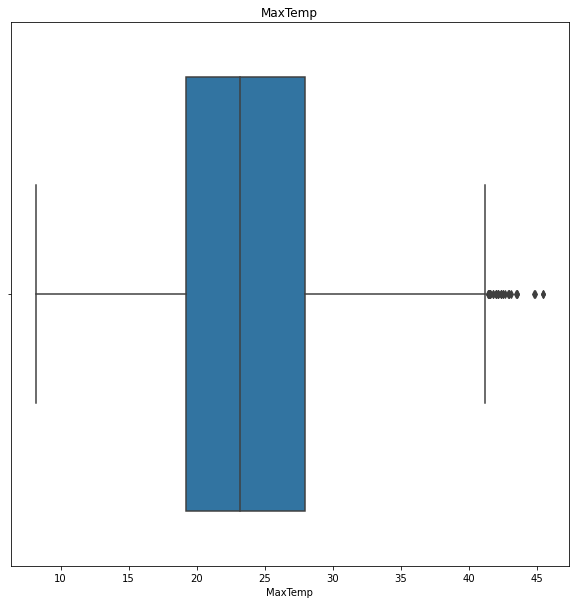

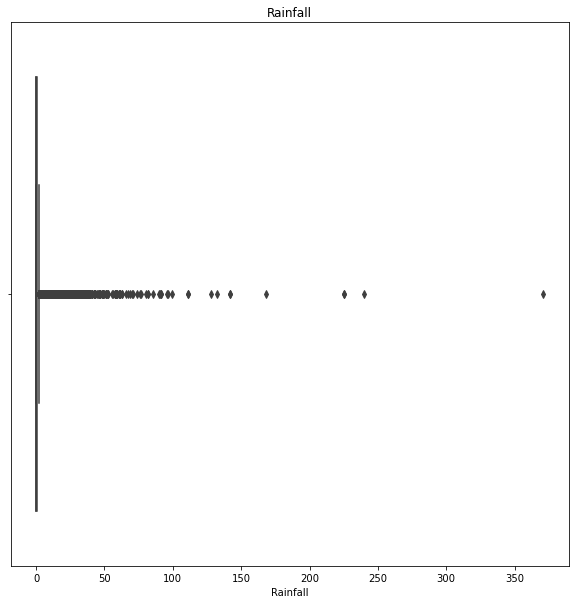

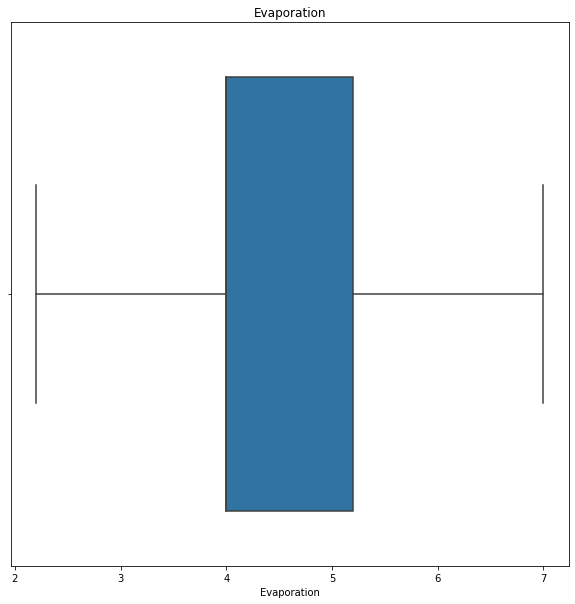

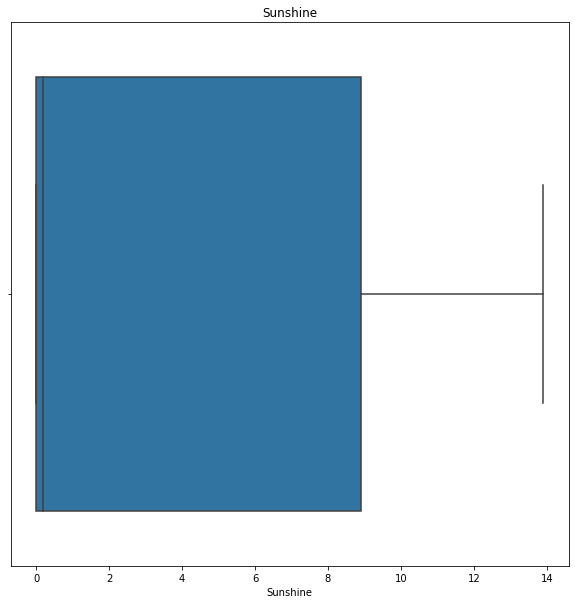

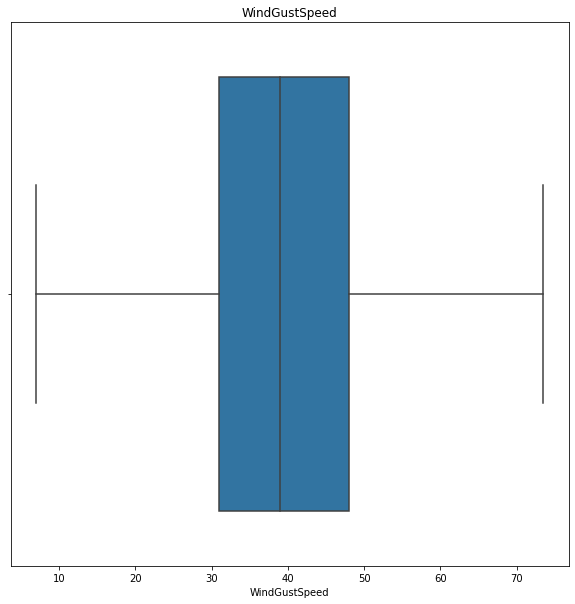

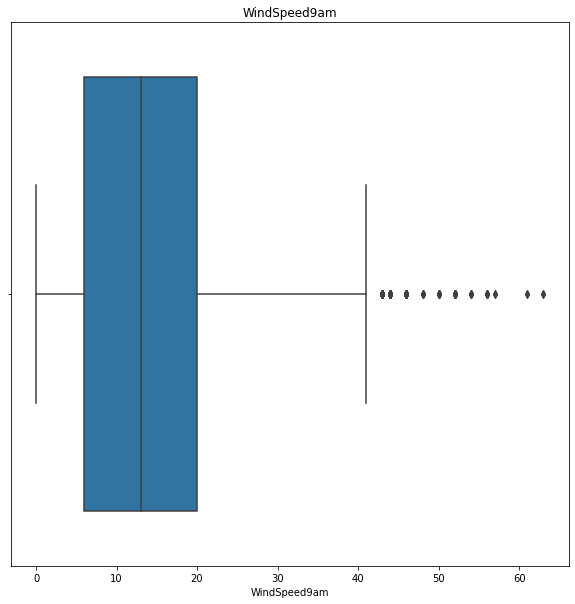

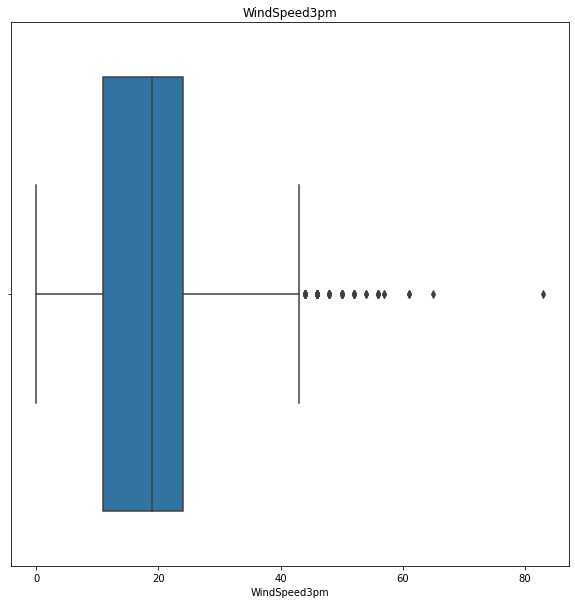

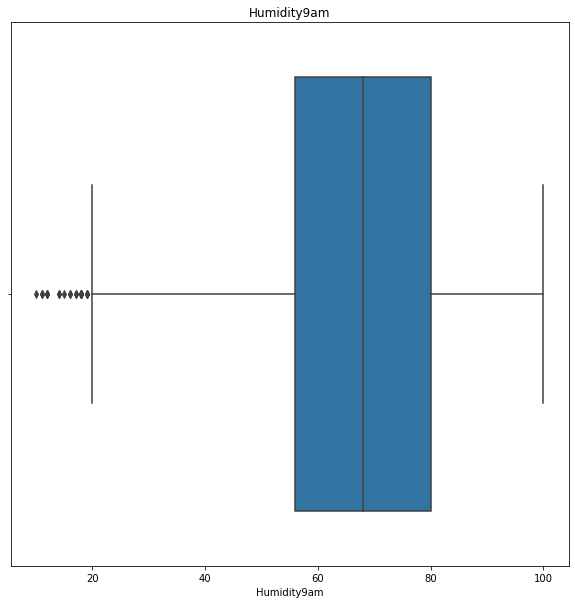

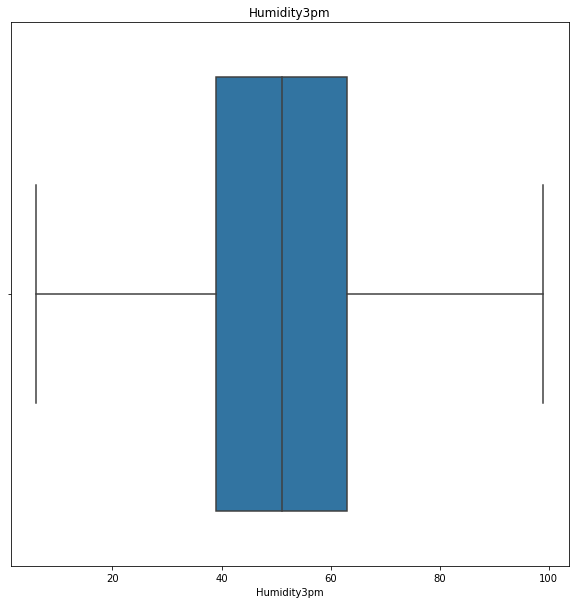

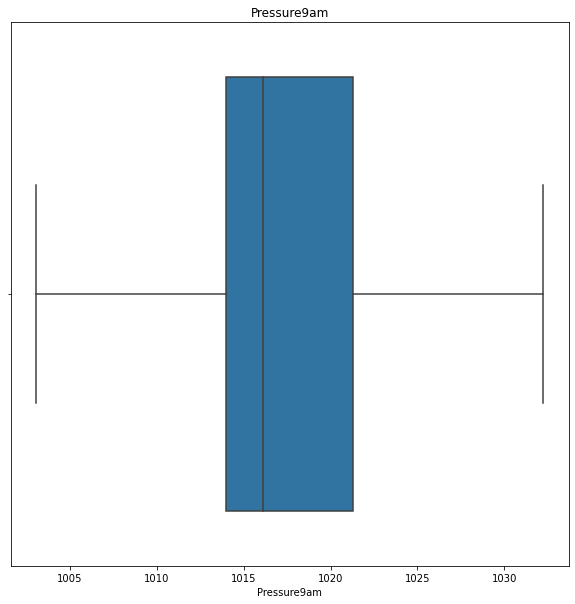

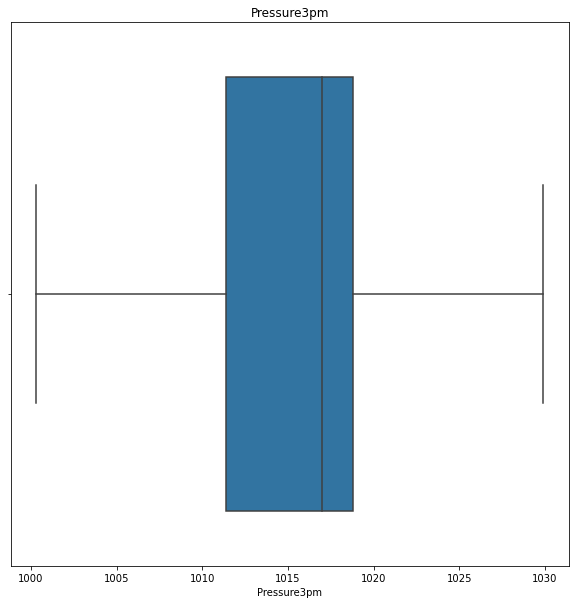

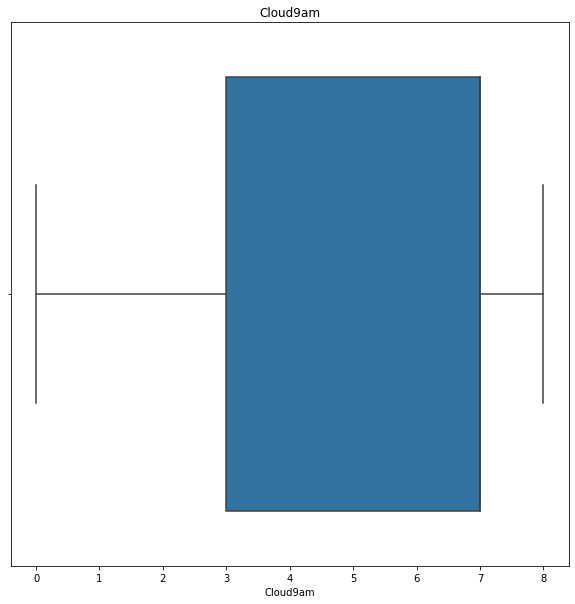

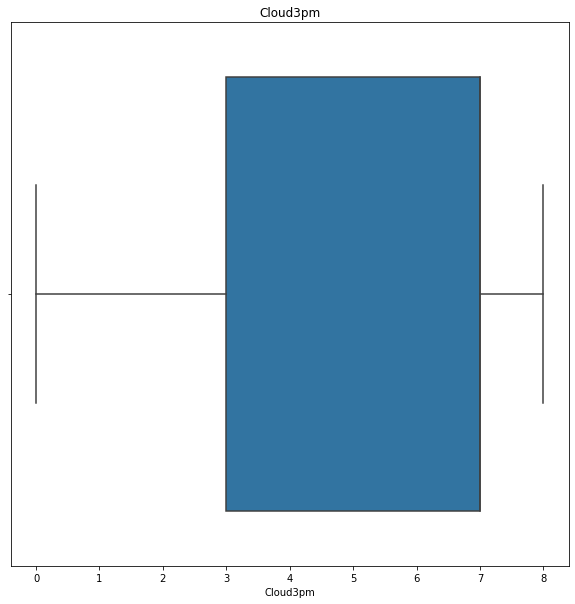

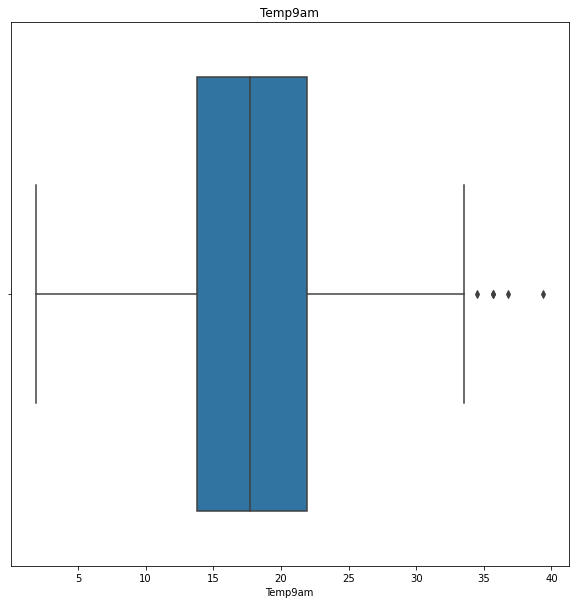

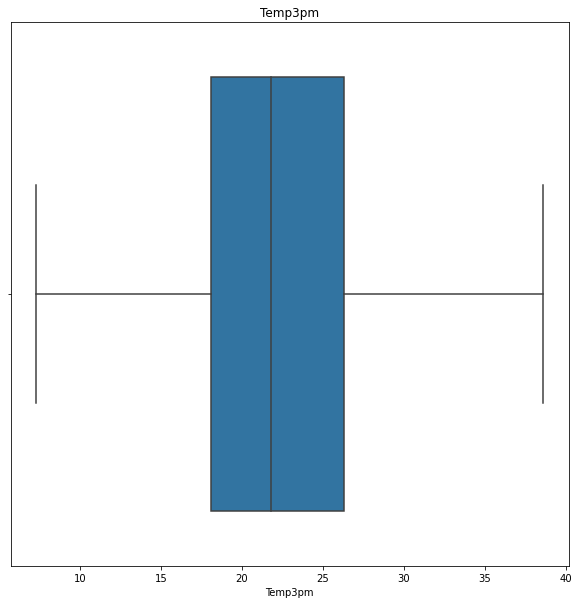

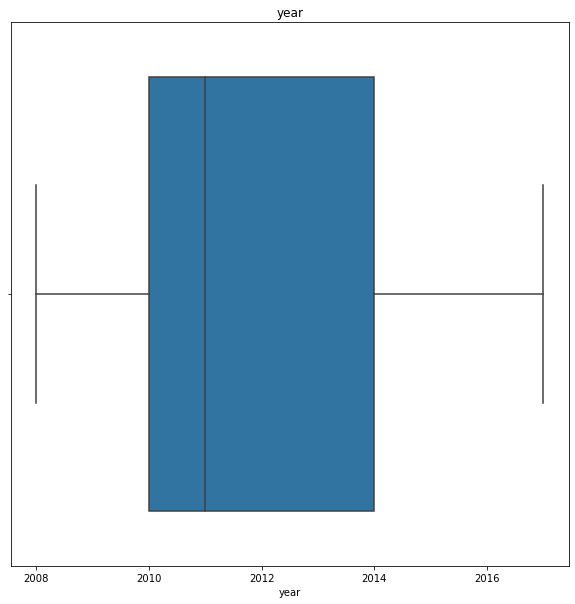

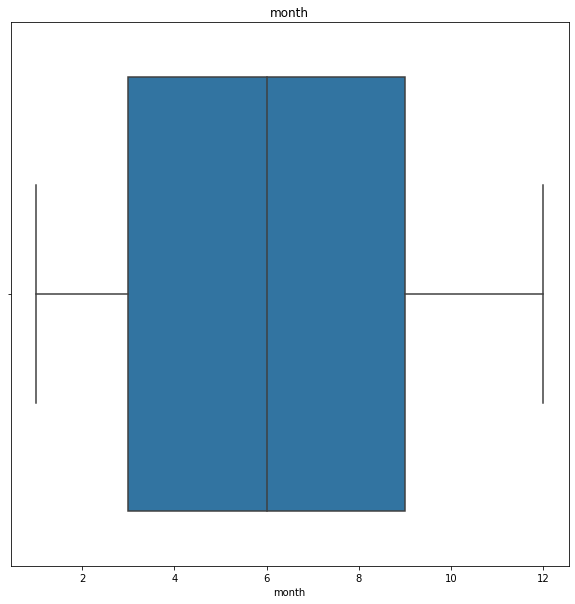

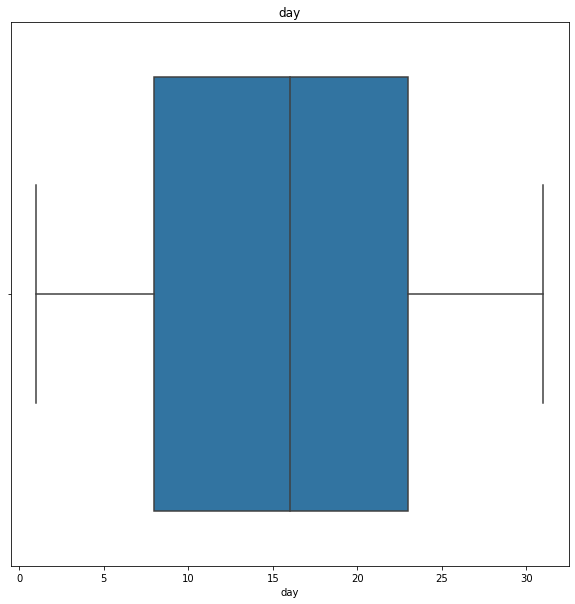

In [296]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)

In [297]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

<AxesSubplot:>

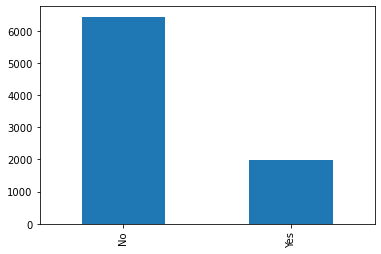

In [298]:
df['RainTomorrow'].value_counts().plot(kind='bar')

No values are more and it is also imbalanced

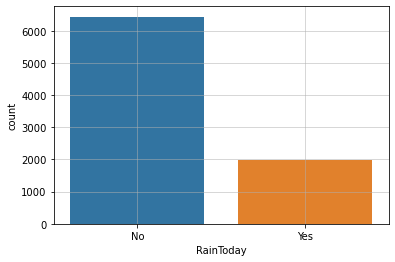

In [299]:
#Exploring RainToday Variable:

sns.countplot(data=df, x="RainToday")
plt.grid(linewidth = 0.5)
plt.show()

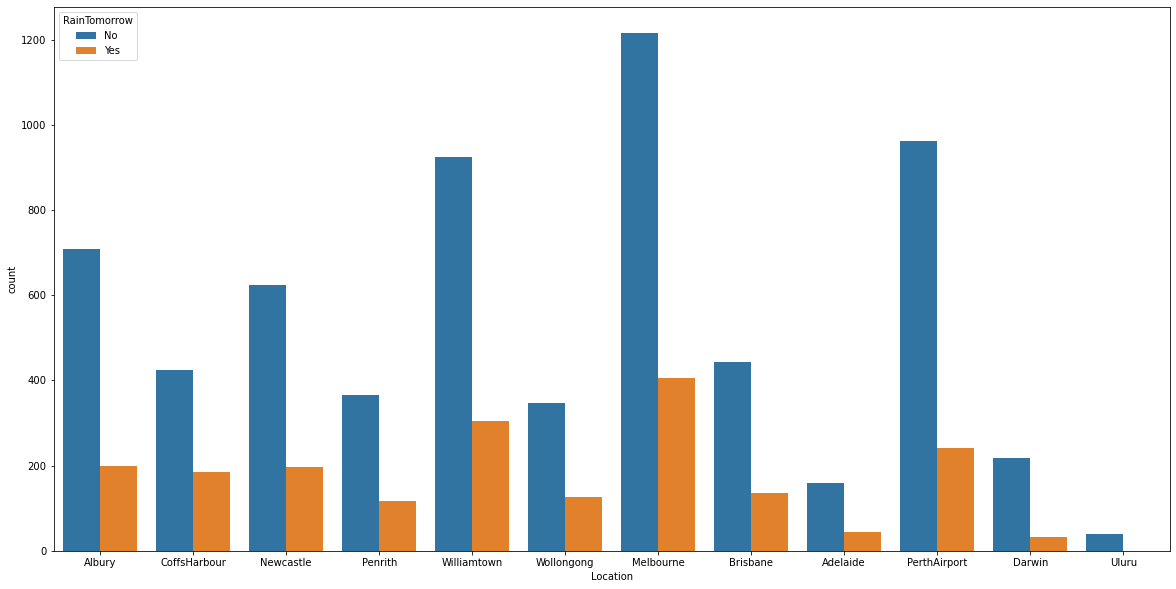

In [300]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=df)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

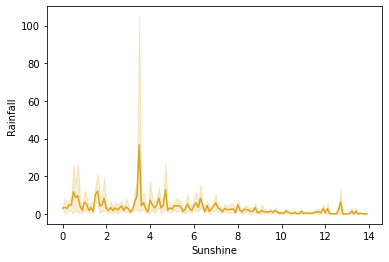

In [301]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='goldenrod')

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

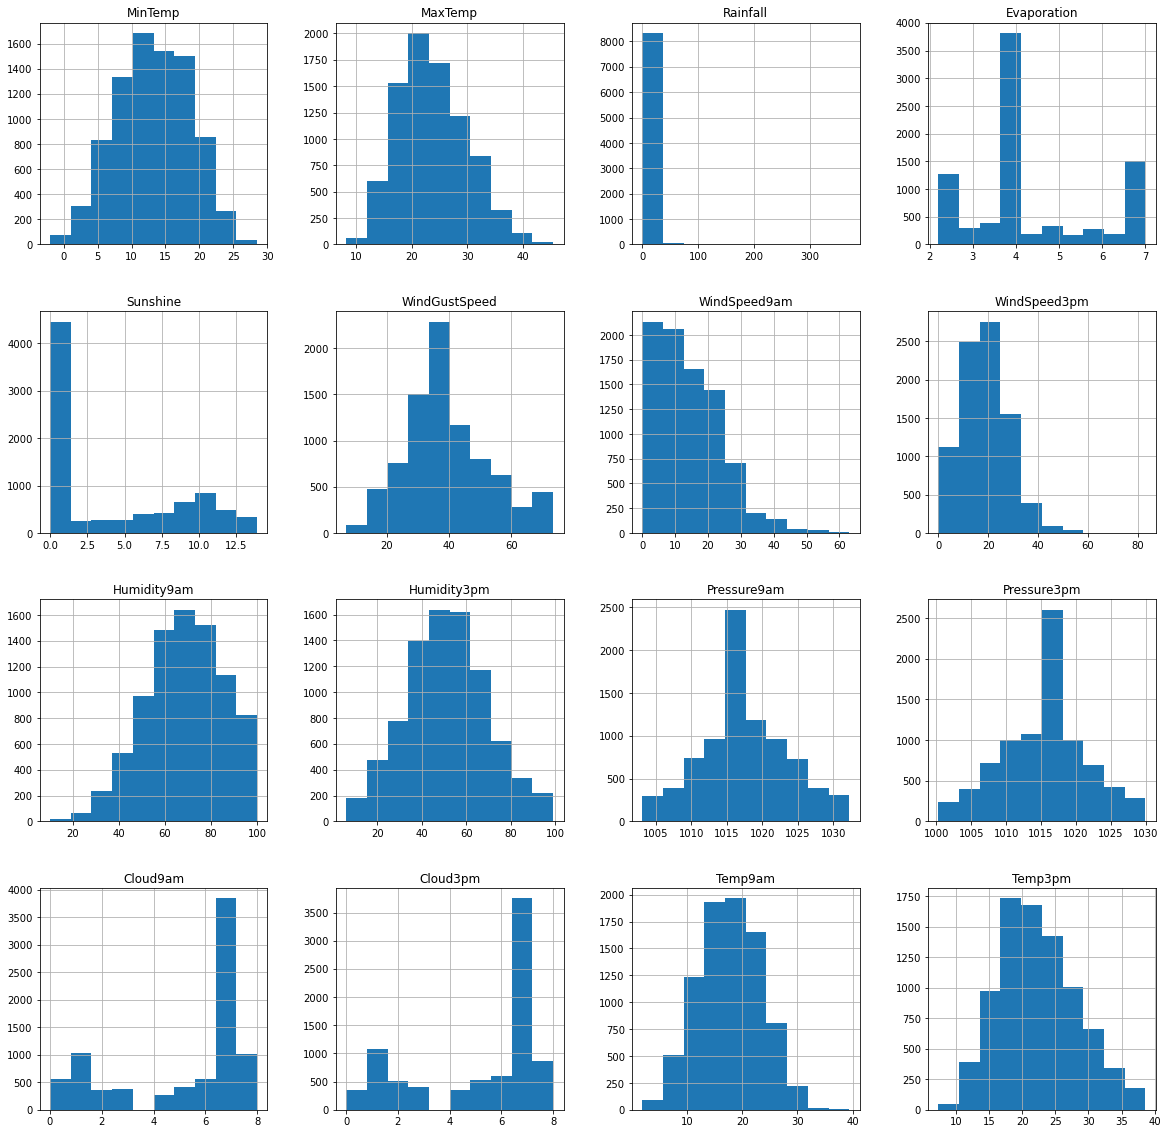

In [302]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
df[num_features].hist(bins=10,figsize=(20,20))

In [303]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.716554,0.085226,0.419140,0.136892,0.235757,0.136791,0.181814,-0.131170,0.077566,-0.417094,-0.434072,0.016539,-0.038681,0.886777,0.688159,0.043248,-0.245593,0.009422
MaxTemp,0.716554,1.000000,-0.086542,0.485257,0.290243,0.143635,0.015776,0.092107,-0.391472,-0.422893,-0.322322,-0.409360,-0.242281,-0.242989,0.864741,0.973062,0.116846,-0.161232,0.016050
Rainfall,0.085226,-0.086542,1.000000,-0.043088,-0.087678,0.080423,0.048278,0.022739,0.227291,0.234625,-0.063734,-0.024886,0.133553,0.101161,-0.007002,-0.089940,0.004491,-0.016258,-0.013029
Evaporation,0.419140,0.485257,-0.043088,1.000000,0.349406,0.209397,0.210072,0.178560,-0.366713,-0.237168,-0.246627,-0.292976,-0.173953,-0.200633,0.491122,0.470896,0.058791,-0.005275,0.018079
Sunshine,0.136892,0.290243,-0.087678,0.349406,1.000000,0.088620,0.213718,0.175902,-0.381333,-0.314459,0.055119,-0.091969,-0.574466,-0.545069,0.267029,0.291198,-0.265601,0.019281,0.007805
WindGustSpeed,0.235757,0.143635,0.080423,0.209397,0.088620,1.000000,0.609492,0.639513,-0.275663,-0.094892,-0.376277,-0.379425,-0.008481,0.027787,0.207213,0.105606,-0.048099,0.049583,-0.002888
WindSpeed9am,0.136791,0.015776,0.048278,0.210072,0.213718,0.609492,1.000000,0.563132,-0.358959,-0.111892,-0.110500,-0.185927,-0.034985,0.003334,0.110317,0.000163,-0.091387,0.038695,-0.002990
WindSpeed3pm,0.181814,0.092107,0.022739,0.178560,0.175902,0.639513,0.563132,1.000000,-0.251335,-0.091665,-0.191771,-0.244930,-0.017971,-0.028342,0.187505,0.069874,-0.060815,0.049332,-0.006827
Humidity9am,-0.131170,-0.391472,0.227291,-0.366713,-0.381333,-0.275663,-0.358959,-0.251335,1.000000,0.633913,0.118982,0.197525,0.348001,0.264800,-0.378946,-0.383419,0.100705,-0.115844,0.003916
Humidity3pm,0.077566,-0.422893,0.234625,-0.237168,-0.314459,-0.094892,-0.111892,-0.091665,0.633913,1.000000,-0.000074,0.076926,0.314862,0.319006,-0.132231,-0.490761,-0.027109,-0.074097,0.011884


<AxesSubplot:>

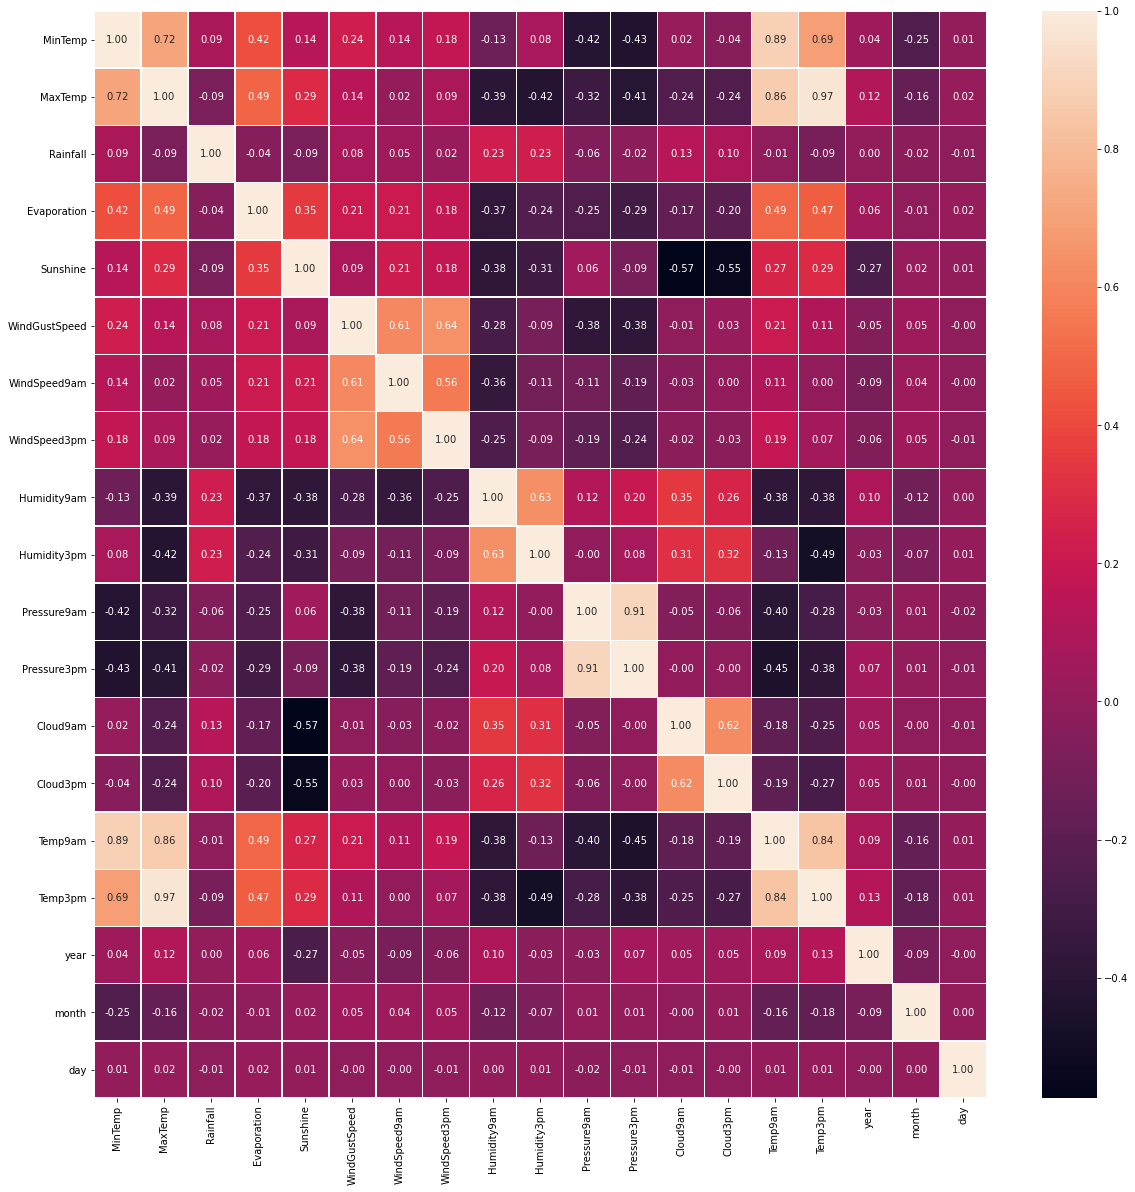

In [304]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.5,annot=True,fmt=".2f")

In [305]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [306]:
df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

# pd.get_dummies(rain['RainToday'],drop_first = True)

df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [307]:
def encode_data(feature_name):
    mapping_dict = {}
    unique_values = list(df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [308]:
df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [309]:
df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [310]:
df['Location'].replace(encode_data('Location'), inplace = True)

{'Albury': 0, 'CoffsHarbour': 1, 'Newcastle': 2, 'Penrith': 3, 'Williamtown': 4, 'Wollongong': 5, 'Melbourne': 6, 'Brisbane': 7, 'Adelaide': 8, 'PerthAirport': 9, 'Darwin': 10, 'Uluru': 11}


In [311]:
df['WindDir3pm'].replace(encode_data('WindDir3pm'), inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [312]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,4.0,0.0,0,44.0,0,0,...,1007.1,8.0,7.0,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,4.0,0.0,1,44.0,1,1,...,1007.8,7.0,7.0,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,4.0,0.0,2,46.0,0,1,...,1008.7,7.0,2.0,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,4.0,0.0,3,24.0,2,2,...,1012.8,7.0,7.0,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,4.0,0.0,0,41.0,3,3,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [313]:
x= df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [314]:
x.shape

(8425, 24)

In [315]:
y.shape

(8425,)

In [316]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.5957149 ,  0.04039106, -0.15101108, ..., -1.65889601,
         1.61669646, -1.67773291],
       [-1.5957149 , -1.07478085,  0.20800875, ..., -1.65889601,
         1.61669646, -1.56392626],
       [-1.5957149 , -0.05253993,  0.30592325, ..., -1.65889601,
         1.61669646, -1.45011961],
       ...,
       [ 2.08470317, -1.44650482,  0.50175225, ...,  1.9804232 ,
        -0.12861066,  0.8260134 ],
       [ 2.08470317, -1.00043606,  0.51807133, ...,  1.9804232 ,
        -0.12861066,  0.93982005],
       [ 2.08470317,  0.31918404, -0.78745533, ...,  1.9804232 ,
        -0.12861066,  1.0536267 ]])

In [317]:
#Balancing the dataset
from imblearn.over_sampling import SMOTE
smt=SMOTE()
xb,yb=smt.fit_resample(x,y)

In [318]:
#Finding the best fit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
sc=0
rs=0
lr=LogisticRegression()
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(xb,yb,test_size=0.23,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>sc:
        sc=acc
        rs=i
print(f'Best accuracy {sc} at random state {rs}')

Best accuracy 0.7783783783783784 at random state 417


In [319]:
x_train,x_test,y_train,y_test=train_test_split(xb,yb,test_size=0.23,random_state=417)

In [320]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [321]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'{m}:')
    print('accuracy score:',accuracy_score(y_test,predm))
    print('confusion matrix:\n',confusion_matrix(y_test,predm))
    print('classification report:\n',classification_report(y_test,predm))
    cvscore=cross_val_score(m,xb,yb,cv=5)
    print('Mean cv score:',cvscore.mean())
    print('\n')

LogisticRegression():
accuracy score: 0.7783783783783784
confusion matrix:
 [[1151  308]
 [ 348 1153]]
classification report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1459
           1       0.79      0.77      0.78      1501

    accuracy                           0.78      2960
   macro avg       0.78      0.78      0.78      2960
weighted avg       0.78      0.78      0.78      2960

Mean cv score: 0.6925808354102175


SVC():
accuracy score: 0.7679054054054054
confusion matrix:
 [[1167  292]
 [ 395 1106]]
classification report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77      1459
           1       0.79      0.74      0.76      1501

    accuracy                           0.77      2960
   macro avg       0.77      0.77      0.77      2960
weighted avg       0.77      0.77      0.77      2960

Mean cv score: 0.7302706577871756


DecisionTreeClassifier():
accuracy 

Random Forest classifier is giving more accuracy i.e. 94%

In [322]:
from sklearn.model_selection import GridSearchCV
par={'n_estimators':range(100,1000,100),'criterion':['gini','entropy'],'max_depth':range(0,20),
    'min_samples_leaf':range(2,21,2),'min_samples_split':range(0,10),'max_features':['auto','sqrt','log2']}
grid=GridSearchCV(RandomForestClassifier(),param_grid=par,cv=5,verbose=True)
grid.fit(x_train,y_train)
print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)
print('best parameters:',grid.best_params_)

Fitting 5 folds for each of 108000 candidates, totalling 540000 fits


KeyboardInterrupt: 

In [326]:
rf=RandomForestClassifier(criterion='gini',max_depth=5,max_features='sqrt',min_samples_leaf=2,min_samples_split=6,n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('score: ',accuracy_score(y_test,pred))
print('confusion matrix:\n ',confusion_matrix(y_test,pred))
print('classification report: ',classification_report(y_test,pred))
predictions=le.inverse_transform(pred)

score:  0.8152027027027027
confusion matrix:
  [[1208  251]
 [ 296 1205]]
classification report:                precision    recall  f1-score   support

           0       0.80      0.83      0.82      1459
           1       0.83      0.80      0.82      1501

    accuracy                           0.82      2960
   macro avg       0.82      0.82      0.82      2960
weighted avg       0.82      0.82      0.82      2960



AttributeError: 'LogisticRegression' object has no attribute 'inverse_transform'